<a href="https://colab.research.google.com/github/Fenilsavani-and/Portfolio_Optimization/blob/main/MVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import cvxpy as cp
from scipy.optimize import minimize


# Model MVO with 2 different methods 1) regular MVO 2) Tangency Portfolio Method.

In [5]:
   from google.colab import drive
   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Portfolio_Optimization/Data_pctg.csv')

In [ ]:
# data is already preprocessed with log(n) value:

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Portfolio_Optimization/Data_pctg.csv', index_col='Date')
df = df

In [ ]:
df

,SMCI,DECK,RS,CSL,GDDY,VST,GGG,MANH,LII,WSM,SAIA,LECO,RPM,XPO
Date,,,,,,,,,,,,,,
2019-01-03,0.039735,-0.028044,-0.025039,-0.019115,-0.041229,-0.009383,-0.030799,-0.023702,-0.017952,-0.006578,-0.009901,-0.028995,-0.048544,-0.040243
2019-01-04,-0.008917,-0.031953,0.041320,0.020194,0.039349,0.040595,0.032026,0.034232,0.034676,0.014446,0.019815,0.036438,-0.047741,0.028737
2019-01-07,0.008997,0.027178,-0.002480,0.000000,0.016773,0.016905,0.000481,0.017606,-0.002823,0.026503,-0.003450,0.004569,0.010524,0.039705
2019-01-08,-0.006369,0.007354,0.037845,0.015340,-0.008798,0.000426,0.017793,0.031142,0.013425,0.026975,0.026057,0.020720,0.035789,0.017911
2019-01-09,-0.004487,0.004761,0.004525,0.013842,0.006499,-0.006817,0.009213,0.011857,0.012481,0.004503,0.014740,0.013492,0.010603,0.029880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.047538,-0.014827,0.013154,0.004474,-0.009261,0.006086,0.008053,0.001683,0.000631,-0.005812,0.002618,0.008312,0.005643,0.001903
2023-12-26,0.015912,-0.008231,0.000248,0.006826,0.005760,0.004734,0.005442,-0.003996,0.005113,-0.003930,0.013301,0.006778,0.003830,0.006815
2023-12-27,0.002276,-0.000320,0.000566,-0.000891,0.000657,0.004712,0.001152,-0.013132,0.006118,0.003107,-0.013585,0.002820,-0.000621,-0.002219


In [ ]:
# 1) First MVO model with formula (4.13) equation risky and risk-free assets:

def mean_variance_opt(mu, cv, Er):
    n = len(mu)
    I = np.ones((n, 1))
    A = np.dot(np.dot(I.T, np.linalg.inv(cv)), mu)       # A,B,C,D > 0
    B = np.dot(np.dot(mu.T, np.linalg.inv(cv)), mu)
    C = np.dot(np.dot(I.T, np.linalg.inv(cv)), I)
    D = B * C - A**2
    lam = (C * Er - A) / D
    gam = (B - A * Er) / D
    wts = lam[0] * np.dot(np.linalg.inv(cv), mu) + gam[0] * np.dot(np.linalg.inv(cv), I) # First Equation.
    g = (B * np.dot(np.linalg.inv(cv), I) - A * np.dot(np.linalg.inv(cv), mu)) / D
    h = (C * np.dot(np.linalg.inv(cv), mu) - A * np.dot(np.linalg.inv(cv), I)) / D
    wts = g + h * Er   #Second Equation.
    return wts


# Example usage:
mu = np.round(df.mean().values.flatten()* 100, 4).reshape(-1, 1)   # Mean Return of last 5 years. ans is ex: 0.23
# Expected returns of assets
cv = df.cov().to_numpy()  # Covariance matrix
Er = 0.15  # Target expected return

weights = mean_variance_opt(mu, cv, Er)
print("Optimal weights:", weights)



Optimal weights: [[ 0.14001633]
 [ 0.08197483]
 [ 0.178299  ]
 [ 0.10087654]
 [ 0.00916674]
 [ 0.11393335]
 [-0.04380577]
 [ 0.05734808]
 [ 0.08422184]
 [ 0.02527823]
 [ 0.11686465]
 [ 0.18606394]
 [ 0.04472674]
 [-0.09496449]]


In [ ]:
print("Standard Deviation of portfolio:", np.sqrt(np.dot(np.dot(weights.T, cv),weights)))

Standard Deviation of portfolio: [[0.01653438]]


In [ ]:
print("Portfolio Expected Returns E(r):", np.dot(weights.T, mu))

Portfolio Expected Returns E(r): [[0.15]]


In [ ]:
# 1.2) MVO Model with Tangency Portfolio Method:

def mean_variance_Tangency(mu, cv, Er, rf):
    global A, B, C, D, H, I, wts
    n = len(mu)
    I = np.ones((n, 1))
    A = np.dot(np.dot(I.T, np.linalg.inv(cv)), mu)       # A,B,C,D > 0
    B = np.dot(np.dot(mu.T, np.linalg.inv(cv)), mu)
    C = np.dot(np.dot(I.T, np.linalg.inv(cv)), I)
    D = B * C - A**2
    H = ((B) - 2*(A)*(rf)) + ((C)*(rf**2))


    wts = (1/(A - C*rf))*(np.dot(np.linalg.inv(cv),(mu - rf*I)))
    return wts


# Example usage:
mu = np.round(df.mean().values.flatten()*100, 4).reshape(-1, 1)   # Mean Return of last 5 years. ans is ex: 0.23
# Expected returns of assets
cv = df.cov().to_numpy()  # Covariance matrix
Er = 0.15  # Target expected return
rf = 4 # Risk Free return based on Bond yield 10 year.
weights = mean_variance_Tangency(mu, cv, Er, rf)
print("Optimal weights:", weights)



Optimal weights: [[-0.01519032]
 [ 0.0192848 ]
 [ 0.05325958]
 [ 0.06955675]
 [ 0.17379223]
 [ 0.14010349]
 [ 0.14786053]
 [-0.05843659]
 [ 0.20427826]
 [-0.04085716]
 [-0.03356886]
 [ 0.2225845 ]
 [ 0.2257243 ]
 [-0.1083915 ]]


In [ ]:
print("Portfolio Expected Returns E(r):", rf + (H/(A-C*rf)))

Portfolio Expected Returns E(r): [[0.0650449]]


In [ ]:
print("Standard Deviation of portfolio:", np.sqrt(np.dot(np.dot(weights.T, cv),weights)))

Standard Deviation of portfolio: [[0.01429041]]


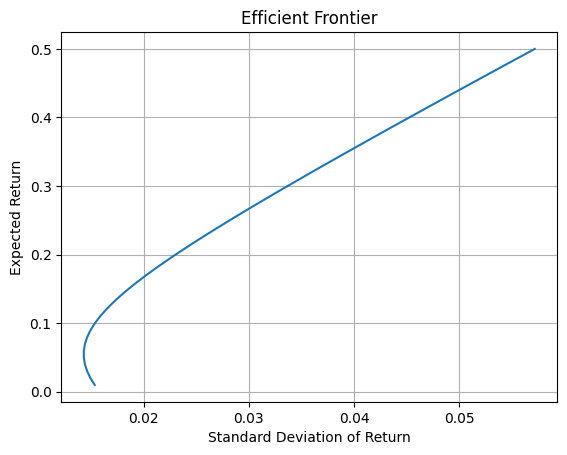

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly as px


Er_vec = np.linspace(0.01, 0.5, 50)  # Expected returns numbers
Sig_vec = np.zeros((50, 1))          # Deviation based on Expected returns
j = 0
for Er in Er_vec:
  j += 1

  weights = mean_variance_opt(mu, cv, Er)
  Sig_vec[j - 1] = np.sqrt(np.dot(np.dot(weights.T, cv), weights))

plt.plot(Sig_vec, Er_vec)
plt.xlabel('Standard Deviation of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


## **# 2) Model Treynor Black :**

In [3]:
from sklearn.linear_model import LinearRegression

In [8]:
df2 = pd.read_csv('/content/drive/My Drive/Portfolio_Optimization/datasp.csv', index_col='Date')
df2

,SMCI,DECK,RS,CSL,GDDY,VST,GGG,MANH,LII,WSM,SAIA,LECO,RPM,XPO,SP400,TreasuryBill,ExcessReurn
Date,,,,,,,,,,,,,,,,,
1/3/19,0.038966,-0.028445,-0.025357,-0.019300,-0.042103,-0.009427,-0.031283,-0.023988,-0.018115,-0.006599,-0.009950,-0.029424,-0.049762,-0.041075,-0.015905,-0.004219,-0.011686
1/4/19,-0.008957,-0.032475,0.040489,0.019993,0.038595,0.039793,0.031524,0.033659,0.034088,0.014343,0.019621,0.035790,-0.048918,0.028332,0.032349,0.004237,0.028112
1/7/19,0.008957,0.026815,-0.002483,0.000000,0.016634,0.016764,0.000481,0.017452,-0.002827,0.026158,-0.003456,0.004558,0.010469,0.038937,0.010972,0.016878,-0.005906
1/8/19,-0.006390,0.007327,0.037147,0.015224,-0.008837,0.000426,0.017636,0.030667,0.013336,0.026618,0.025723,0.020508,0.035163,0.017753,0.016919,0.000000,0.016919
1/9/19,-0.004497,0.004750,0.004515,0.013747,0.006478,-0.006841,0.009171,0.011787,0.012404,0.004493,0.014632,0.013402,0.010548,0.029443,0.009124,-0.004149,0.013274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/22/23,-0.048705,-0.014938,0.013068,0.004464,-0.009304,0.006068,0.008021,0.001682,0.000631,-0.005829,0.002615,0.008277,0.005627,0.001901,0.003387,0.003831,-0.000444
12/26/23,0.015787,-0.008265,0.000248,0.006802,0.005743,0.004723,0.005427,-0.004004,0.005100,-0.003938,0.013213,0.006755,0.003823,0.006792,0.007627,0.001908,0.005718
12/27/23,0.002274,-0.000320,0.000566,-0.000892,0.000657,0.004701,0.001151,-0.013218,0.006099,0.003102,-0.013678,0.002816,-0.000621,-0.002222,0.000157,-0.001905,0.002061


In [9]:
list = df2.columns.values[:-3]
list

array(['SMCI', 'DECK', 'RS', 'CSL', 'GDDY', 'VST', 'GGG', 'MANH', 'LII',
       'WSM', 'SAIA', 'LECO', 'RPM', 'XPO'], dtype=object)

Find Beta for stocks with covariance and variance value which aligns regression model:

In [10]:
# testing of beta for SMCI:

# subset_cv = round(df_subset.cov(),7)
# column_names = df_subset.columns
# cv_df_subset = pd.DataFrame(subset_cv, columns=column_names, index=column_names)
# cv_df_subset

# var = round(df_subset['SP400'].var(),7)
# cov = cv_df_subset.iloc[4, 14]
# beta = cov/var
# beta

In [11]:
beta = []
alpha = []
for i in list:

    X = df2['ExcessReurn'].values.reshape(-1,1)  # SP400  in first phase
    y = df2[f'{i}'].values.reshape(-1,1)

    linreg = LinearRegression().fit(X, y)

    beta.append(round(linreg.coef_[0][0],6))
    alpha.append(round(linreg.intercept_[0],6))


beta

[0.004081,
 -0.005828,
 -0.003574,
 0.004557,
 -0.001702,
 0.003029,
 -0.003362,
 -0.000293,
 0.002155,
 -1.2e-05,
 0.00486,
 0.003612,
 0.003454,
 0.011098]

In [12]:
alpha

[0.002363,
 0.001267,
 0.001139,
 0.000979,
 0.000406,
 0.000564,
 0.000612,
 0.001295,
 0.000647,
 0.001203,
 0.001691,
 0.00091,
 0.000627,
 0.001252]

In [13]:
df_subset = df2.iloc[:, :-2]


In [14]:
### fase 2::
columns_to_keep = ['SMCI', 'DECK', 'RS', 'CSL', 'GDDY', 'VST', 'GGG', 'MANH', 'LII','WSM', 'SAIA', 'LECO', 'RPM', 'XPO','ExcessReurn']

# Create a new DataFrame with selected columns:
df_subset = df2[columns_to_keep].copy()


In [15]:
df_subset

,SMCI,DECK,RS,CSL,GDDY,VST,GGG,MANH,LII,WSM,SAIA,LECO,RPM,XPO,ExcessReurn
Date,,,,,,,,,,,,,,,
1/3/19,0.038966,-0.028445,-0.025357,-0.019300,-0.042103,-0.009427,-0.031283,-0.023988,-0.018115,-0.006599,-0.009950,-0.029424,-0.049762,-0.041075,-0.011686
1/4/19,-0.008957,-0.032475,0.040489,0.019993,0.038595,0.039793,0.031524,0.033659,0.034088,0.014343,0.019621,0.035790,-0.048918,0.028332,0.028112
1/7/19,0.008957,0.026815,-0.002483,0.000000,0.016634,0.016764,0.000481,0.017452,-0.002827,0.026158,-0.003456,0.004558,0.010469,0.038937,-0.005906
1/8/19,-0.006390,0.007327,0.037147,0.015224,-0.008837,0.000426,0.017636,0.030667,0.013336,0.026618,0.025723,0.020508,0.035163,0.017753,0.016919
1/9/19,-0.004497,0.004750,0.004515,0.013747,0.006478,-0.006841,0.009171,0.011787,0.012404,0.004493,0.014632,0.013402,0.010548,0.029443,0.013274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/22/23,-0.048705,-0.014938,0.013068,0.004464,-0.009304,0.006068,0.008021,0.001682,0.000631,-0.005829,0.002615,0.008277,0.005627,0.001901,-0.000444
12/26/23,0.015787,-0.008265,0.000248,0.006802,0.005743,0.004723,0.005427,-0.004004,0.005100,-0.003938,0.013213,0.006755,0.003823,0.006792,0.005718
12/27/23,0.002274,-0.000320,0.000566,-0.000892,0.000657,0.004701,0.001151,-0.013218,0.006099,0.003102,-0.013678,0.002816,-0.000621,-0.002222,0.002061


In [16]:
# standard deviation value of each stocks and market index:
std = df_subset.std().to_list()
std = [round(s, 6) for s in std]

# Return of stocks and market:
returns = df_subset.mean().to_list()
stk_returns = [round(s, 6) for s in returns]

In [17]:
subset_cv = round(df_subset.cov(),7)
column_names = df_subset.columns
cv_df_subset = pd.DataFrame(subset_cv, columns=column_names, index=column_names)
cv_df_subset



,SMCI,DECK,RS,CSL,GDDY,VST,GGG,MANH,LII,WSM,SAIA,LECO,RPM,XPO,ExcessReurn
SMCI,0.001276,0.000346,0.000255,0.000244,0.000273,0.000180,0.000229,0.000359,0.000223,3.361000e-04,0.000334,0.000234,0.000255,0.000357,2.336000e-04
DECK,0.000346,0.000733,0.000262,0.000244,0.000281,0.000181,0.000240,0.000367,0.000213,3.939000e-04,0.000317,0.000218,0.000227,0.000408,-3.336000e-04
RS,0.000255,0.000262,0.000422,0.000240,0.000184,0.000187,0.000217,0.000246,0.000193,2.708000e-04,0.000285,0.000238,0.000212,0.000322,-2.046000e-04
CSL,0.000244,0.000244,0.000240,0.000413,0.000155,0.000172,0.000214,0.000232,0.000207,2.238000e-04,0.000289,0.000244,0.000214,0.000323,2.608000e-04
GDDY,0.000273,0.000281,0.000184,0.000155,0.000547,0.000184,0.000195,0.000344,0.000152,3.222000e-04,0.000237,0.000158,0.000170,0.000279,-9.740000e-05
VST,0.000180,0.000181,0.000187,0.000172,0.000184,0.000558,0.000157,0.000219,0.000150,1.980000e-04,0.000186,0.000164,0.000148,0.000206,1.734000e-04
GGG,0.000229,0.000240,0.000217,0.000214,0.000195,0.000157,0.000303,0.000252,0.000205,2.494000e-04,0.000273,0.000226,0.000214,0.000289,-1.925000e-04
MANH,0.000359,0.000367,0.000246,0.000232,0.000344,0.000219,0.000252,0.000722,0.000242,3.930000e-04,0.000328,0.000222,0.000247,0.000388,-1.680000e-05
LII,0.000223,0.000213,0.000193,0.000207,0.000152,0.000150,0.000205,0.000242,0.000378,2.707000e-04,0.000266,0.000199,0.000201,0.000290,1.233000e-04
WSM,0.000336,0.000394,0.000271,0.000224,0.000322,0.000198,0.000249,0.000393,0.000271,9.176000e-04,0.000351,0.000244,0.000250,0.000409,-7.000000e-07


In [18]:
# residual of all stocks:
residual_var = []
mkt_cov = cv_df_subset.iloc[14, 14]
for i in range(0,14):
  residual_cv = (cv_df_subset.iloc[i,i]) - ((beta[i]**2)*((mkt_cov)**2))
  residual_var.append(round(residual_cv,7))

residual_var

[0.001276,
 0.0007327,
 0.000422,
 0.000413,
 0.0005474,
 0.0005579,
 0.0003027,
 0.000722,
 0.0003779,
 0.0009176,
 0.0008387,
 0.0003211,
 0.0003496,
 0.0010204]

## stk_return, std, beta, alpha, residual_var

Beta_Mkt = 1, residual_mkt = 0, alpha_mkt = 0.

In [19]:
# step 1) Initial Weight for each assets: this initial weight sum would be 1.

# numerator = alpha[i] / residual_var[i]
denominator = sum(map(lambda i: alpha[i] / residual_var[i], range(0,14)))
Wi = 0
In_wts = []
for i in range(0,14):

  Wi = (alpha[i] / residual_var[i])/denominator
  In_wts.append(round(Wi,6))

In_wts

[0.073744,
 0.068859,
 0.107479,
 0.094394,
 0.029535,
 0.040256,
 0.08051,
 0.071424,
 0.068177,
 0.052206,
 0.080287,
 0.112853,
 0.071418,
 0.048859]

In [20]:
# step 2) Now, we calculate alpha of active portfolio
# Alpha(A) = In_wts[i]*alpha[i]

alpha_A = sum(map(lambda i: In_wts[i]*alpha[i], range(0,14)))
alpha_A

0.001104119964

In [21]:
# step 3) Now, we calculate residual variance of active portfolio:
# residual_A = sum(In_wts[i]**2 * residual_var[i])

residual_A = sum(map(lambda i:((In_wts[i]**2) * residual_var[i]), range(0,14)))
residualA = '{:.10f}'.format(residual_A)
residualA


'0.0000439671'

In [22]:
# step 4) Initial weight of Active Portfolio when Beta of active portfolio = 1:
# Wo = (alpha_A / residual_A)/(stk_returns[14]/mkt_cov)


Wo = round((alpha_A / residual_A)/(stk_returns[14]/mkt_cov),6)
Wo

-212.835502

In [23]:
# step 5) Calculate beta for active portfolio Beta_A:
# beta_A = sum(Int_wts[i]*beta[i])

beta_A = round(sum(map(lambda i:(In_wts[i] * beta[i]), range(0,14))),6)
beta_A

0.001459

In [65]:
# step 6) Final total weight assign to active portfolio:
# WA = Wo / (1+(1-beta_A)*Wo). and passive weight WM = 1 - WA

WA = Wo /(1+ (1-beta_A)*Wo)

print('Weight of Active portfolio', WA)

Weight of Active portfolio 1.0061956135316976


In [25]:
# step 7) Assign weight to all assets after assigning weight to market index:

Wi = [lambda i: (WA * ((alpha[i] / residual_var[i]) / denominator)) for i in range(0, 14)]
Wi_values = [function(i) for i, function in enumerate(Wi)]
Wi_values = [round(value, 6) for value in Wi_values]

Wi_values


[0.0742,
 0.069286,
 0.108144,
 0.094979,
 0.029718,
 0.040506,
 0.081009,
 0.071866,
 0.068599,
 0.05253,
 0.080785,
 0.113552,
 0.07186,
 0.049162]

In [78]:
# step 8) calculate sharpe ratio of entire portfolio:
# SR(m) = R(m)/STD(m)
# SR(p) = sqrt(SR(m)^2 + (alpha_A/residual_A)^2)
from math import sqrt
SRm = stk_returns[14]/(sqrt(mkt_cov))

SRp = sqrt(((SRm)**2) + ((alpha_A/residual_A)**2))
SRp

25.112450098229324

In [37]:
# Risk premium for portfolio:
WM = 1-WA
ERp = (WM + (WA*beta_A))*stk_returns[14] + (WA*alpha_A)
ERp

0.0011428907002740975

In [72]:
VRp = ((WM+WA*beta_A)**2)*mkt_cov + (WA*residual_A)**2
sqrt(VRp)

0.001131953112357387

In [79]:
#Excel method:
# need : betaof complete pf = beta_cp, return of active pf = RA, then we calculate Rp
# calculate Std_Active portfolio = std_A
# calculate std_complete PF = std_CP

WM = 1-WA
RM = stk_returns[14]

beta_cp = (WM*1) + (WA*beta_A)

RA = alpha_A + (beta_A*RM)

RP = WM*RM + WA*RA

std_A = sqrt(((beta_A**2)*mkt_cov) + residual_A )

std_CP = sqrt((beta_cp**2)*(mkt_cov) + (WA*residual_A))

In [80]:
# calculate sharp ratio of active pf and complete pf:

SRA = RA / std_A
print('Active Portfolio Sharpe Ratio:', SRA)

SRP = RP / std_CP
print('Complete Portfolio Sharpe Ratio:', SRP)

Active Portfolio Sharpe Ratio: 0.16480036228961306
Complete Portfolio Sharpe Ratio: 0.16939834859430902


# **Model 3) Black Litterman Theory:**